# Gaussian And Non Gaussian Shears With 2PACF
This notebook stands to create a gaussian and a non-gaussian distribution and calculate 2PACF on them

In [1]:
import numpy as np # to make use of mathematical functions and arrays
import matplotlib.pyplot as plt # for plotting
import seaborn as sb # for plot histograms
import treecorr as tc # to calculate 2pacf

Just for plotting, let's define the following function. Please do not mind it

In [2]:
# **do not mind this cell, it is just for plotting**
def plotpnts (cat,xlim,ylim,boxsize=2,arrow=False,tag=None,scale=2,annotate=True,title=False,w=1,normalized=True,centered=True):
    #tag=[beta,alpha]
    plt.figure(figsize=(scale,scale));alen=boxsize/15;awidth=w*boxsize/200;aoffset=boxsize/30;n=len(cat);labels=[];
    if title: plt.title(title,fontsize=14)
    for ii in range(n):
        labels.append("p"+str(ii)); plt.plot(np.transpose(cat)[0],np.transpose(cat)[1],linestyle="none",marker=".",markersize=1,c="gray",alpha=.4)
    for ii,label in enumerate(labels):
        if arrow:
            anorm=np.linalg.norm([np.transpose(cat)[2][ii],np.transpose(cat)[3][ii]])+10**(-5)
            if normalized:
                dx=np.transpose(cat)[2][ii]*alen/anorm;
                dy=np.transpose(cat)[3][ii]*alen/anorm;
            else:
                dx=np.transpose(cat)[2][ii];
                dy=np.transpose(cat)[3][ii];
            if anorm > 0:
                if centered:
                    plt.arrow(np.transpose(cat)[0][ii]-dx/2,np.transpose(cat)[1][ii]-dy/2,dx,dy,width=awidth,\
                              fc="gray",ec="none",head_width=awidth/100)
                if not centered:
                    plt.arrow(np.transpose(cat)[0][ii],np.transpose(cat)[1][ii],dx,dy,width=awidth,\
                              fc="gray",ec="none",head_width=awidth/100)
                if annotate:plt.annotate(label,(np.transpose(cat)[0][ii],np.transpose(cat)[1][ii]),\
                     xytext=(np.transpose(cat)[0][ii]+aoffset+np.transpose(cat)[2][ii]*alen/anorm,\
                         np.transpose(cat)[1][ii]+aoffset+np.transpose(cat)[3][ii]*alen/anorm))                  
        else: plt.annotate(label,(np.transpose(cat)[0][ii],np.transpose(cat)[1][ii]),\
                     xytext=(np.transpose(cat)[0][ii]+.05,np.transpose(cat)[1][ii]+.05))
    plt.xlim(xlim[0],xlim[1]); plt.ylim(ylim[0],ylim[1])
    plt.xlabel("RA [rad]"); plt.ylabel("DEC [rad]")
    if tag:
        plt.text(-boxsize*2/5 ,boxsize*3/5,"beta="+str(tag[0])[:4]+" deg"+"\nphi="+str(tag[1])[:4]+" deg")
    plt.show()
    pass

## Create distributions
We create $\gamma_1$ and $\gamma_2$; _g1_ and _g2_ respectively, from normal distributions. Then we modify slightly these _g1_ and _g2_ to have a non gaussian _g1_ and _g2_. Let us use _g_ as the array for \(g1,g2\) and gng for the non gaussian ones

In [3]:
# number of galaxies
Npts = 1000 #500 #is enough

# fix the random seed
np.random.seed(17)

# g1 and g2 as normal distributions of Npts with mean zero and standard deviation 0.5
g = np.random.normal(loc=0,size=(Npts,2),scale=.125)

# define gng as a modification of g

# make a copy of g in gng
gng = g.copy()

# modify the entries of gng

# modify g1 entries, we breake the symmetry
for ii,g1 in enumerate(g[:,0]):
    gng[ii,0] = g1+g1**2

# modify g2 entries, we make g2<1 smaller but keep symetry
for ii,g2 in enumerate(g[:,1]):
    gng[ii,1] = g2+g2**(3)

Let us take a look at those distributions _g_ and _gng_

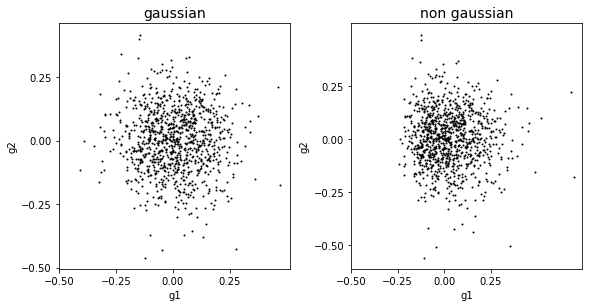

In [4]:
fig,ax=plt.subplots(1,2,figsize=(8,4))
plt.tight_layout(w_pad=3)

ax[0].set_title("gaussian",fontsize=14)
ax[0].plot(np.transpose(g)[0],np.transpose(g)[1],linestyle="none",marker=".",markersize=2,c="black")
ax[0].set_xticks(np.arange(-.5,.5,.25))
ax[0].set_yticks(np.arange(-.5,.5,.25))
ax[0].set_xlabel("g1");ax[0].set_ylabel("g2")

ax[1].set_title("non gaussian",fontsize=14)
ax[1].plot(np.transpose(gng)[0],np.transpose(gng)[1],linestyle="none",marker=".",markersize=2,c="black")
ax[1].set_xticks(np.arange(-.5,.5,.25))
ax[1].set_yticks(np.arange(-.5,.5,.25))
ax[1].set_xlabel("g1");ax[1].set_ylabel("g2")

plt.show()

Notice the non gaussian is neither symmetryc in _g1_ nor has same range for _g2_. Let us take a sight of the histograms for _g_ (first row) and _gng_ (second row)

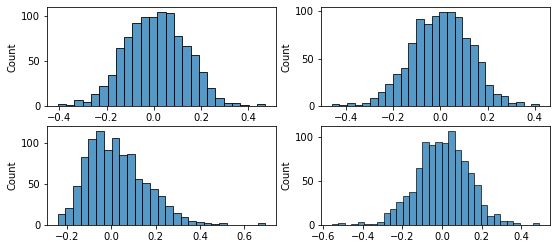

In [5]:
plt.figure(figsize=(9,4))
plt.subplot(2,2,1)
sb.histplot(data=np.transpose(g)[0],kde=False)
plt.subplot(2,2,2)
sb.histplot(data=np.transpose(g)[1],kde=False)
plt.subplot(2,2,3)
sb.histplot(data=np.transpose(gng)[0],kde=False)
plt.subplot(2,2,4)
sb.histplot(data=np.transpose(gng)[1],kde=False)
plt.show()

Now we can give the positions for _g_ and _gng_ with random positions for _ra_ and _dec_

In [6]:
# define size of the box
boxsize = 0.2

# set random seed
np.random.seed(17)

# define ra and dec positions
ra = np.random.uniform(0,boxsize,Npts)

dec=np.random.uniform(0,boxsize,Npts)

# create catalogs for gaussian and non gaussian data
data=np.transpose(np.reshape([ra,dec,np.transpose(g)[0],np.transpose(g)[1]],(4,Npts)))

data_ng=np.transpose(np.reshape([ra,dec,np.transpose(gng)[0],np.transpose(gng)[1]],(4,Npts)))

We see the distributions for _g_ and _gng_ are similar but not the same

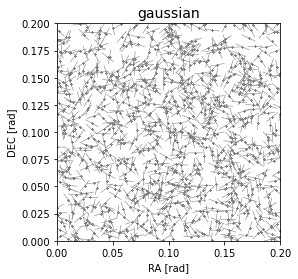

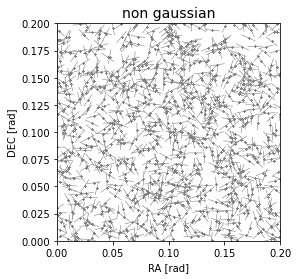

In [7]:
plotpnts(data,[0,boxsize],[0,boxsize],boxsize=boxsize,arrow=True,scale=4,w=.5,annotate=False,title="gaussian")
plotpnts(data_ng,[0,boxsize],[0,boxsize],boxsize=boxsize,arrow=True,scale=4,w=.5,annotate=False,title="non gaussian")

## Calculate teh 2PACFs
We use TreeCorr (TC) to calculate the correlation functions $\xi_{+}$ and $\xi_-$. First define the required parameters

In [8]:
# number of bins in r
nrbin = 10

# define range in distance for estimator

# minimum value in distance
minr = 10**(-8)

# maximum value in distance
maxr = boxsize

Calculate both correlation functions for _g_ and _gng_, first create the `Catalog`s and the `GGCorrelation`s, then do the calculations with `process` method

In [9]:
# define Catalogs

# Catalog for gaussian
catalog=tc.Catalog(ra=ra,dec=dec,g1=np.transpose(g)[0],g2=np.transpose(g)[1],ra_units="rad",dec_units="rad")

# Catalog for non gaussian
catalogng=tc.Catalog(ra=ra,dec=dec,g1=np.transpose(gng)[0],g2=np.transpose(gng)[1],ra_units="rad",dec_units="rad")

# define GGCorrelation instances

# GGCorrelation for gaussian
ggcorrg=tc.GGCorrelation(nbins=nrbin,min_sep=minr,max_sep=maxr,sep_units="rad",verbose=2)

# GGCorrelation for non gaussian
ggcorrng=tc.GGCorrelation(nbins=nrbin,min_sep=minr,max_sep=maxr,sep_units="rad",verbose=2)

# calculate the 2PACFs

# 2PACF for gaussian
ggcorrg.process(catalog)

# 2PACF for non gaussian
ggcorrng.process(catalogng)

nbins = 10, min,max sep = 1e-08..0.2 rad, bin_size = 1.68112
nbins = 10, min,max sep = 1e-08..0.2 rad, bin_size = 1.68112
Starting process GG auto-correlations
Using 8 threads.
Building GField
Starting 65 jobs.
.................................................................
varg = 0.016131: sig_sn (per component) = 0.127009
Starting process GG auto-correlations
Using 8 threads.
Building GField
Starting 65 jobs.
.................................................................
varg = 0.017872: sig_sn (per component) = 0.133686


## Results
Now we see the 2PACFs for _g_ and _gng_

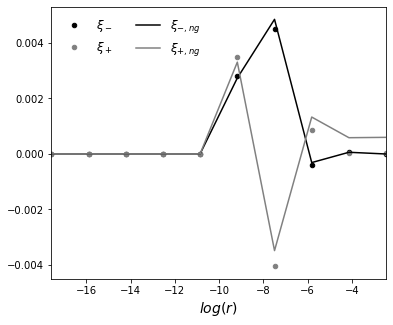

In [10]:
plt.figure(figsize=(6,5))
plt.plot(ggcorrg.logr,ggcorrg.xim,linestyle="none",marker=".",markersize=9,label="$\\xi_-$",c="black")
plt.plot(ggcorrg.logr,ggcorrg.xip,linestyle="none",marker=".",markersize=9,label="$\\xi_+$",c="grey")
plt.plot(ggcorrg.logr,ggcorrng.xim,markersize=6,label="$\\xi_{-,ng}$",c="black")
plt.plot(ggcorrg.logr,ggcorrng.xip,markersize=6,label="$\\xi_{+,ng}$",c="grey")
plt.legend(frameon=False,fontsize=12,ncol=2)
plt.xlim([min(ggcorrg.logr),max(ggcorrg.logr)]);plt.xlabel("$log(r)$",fontsize=14)
plt.show()

We notice a small deviation of non-gaussian from gaussian distributions, nontheless these result from too high midification on gaussian distribution; a prefactor diminishing the amplitude for the perturbations we made above would lead to see we are not able to tell apart both distributions with 2PACF.

## Time to Exercise

**a)** Create a flux distribution, i.e., each point has direction and magnitude. Do it as simple as the following image. 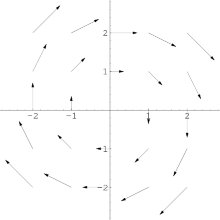

The image has a non-normalized flux, but you should calculate $\xi_\pm$ for it in both cases and report your results. Remember to increase the number of points in $r$ and $\theta$.

**b)** Change the dispertion and notice how do $\xi_-$ and $\xi_+$ change. Report your results.